In [ ]:
# download R library packages 

In [1]:
library(curl)


In [2]:
# define the directory and file name for downloading modis data
dataPath <- "/scratch/data/modis"
#downloadList <-"/scratch/data/modis/CR-LAI-2019-2020-granule-list.txt"
downloadList <-"/scratch/data/modis/modis_lai2010_2019-download-list.txt"


In [3]:
## scanning the lists of files
filesl <- scan(downloadList, what='list', sep='\n')

## downloading modis files 

for (d in 1:length(filesl)){

 curl_download(url=filesl[d], destfile=paste0(dataPath,"/",basename(filesl[d])),quiet = T, handle =new_handle())

  Sys.sleep(1)

    #  print(paste0('Downloading source data (Step 1 of 6): ',round(d /length(filesl) * 100, digits=2),'%'))
   print(d)
}



[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13
[1] 14
[1] 15
[1] 16
[1] 17
[1] 18
[1] 19
[1] 20
[1] 21
[1] 22
[1] 23
[1] 24
[1] 25
[1] 26
[1] 27
[1] 28
[1] 29
[1] 30
[1] 31
[1] 32
[1] 33
[1] 34
[1] 35
[1] 36
[1] 37
[1] 38
[1] 39
[1] 40
[1] 41
[1] 42
[1] 43
[1] 44
[1] 45
[1] 46
[1] 47
[1] 48
[1] 49
[1] 50
[1] 51
[1] 52
[1] 53
[1] 54
[1] 55
[1] 56
[1] 57
[1] 58
[1] 59
[1] 60
[1] 61
[1] 62
[1] 63
[1] 64
[1] 65
[1] 66
[1] 67
[1] 68
[1] 69
[1] 70
[1] 71
[1] 72
[1] 73
[1] 74
[1] 75
[1] 76
[1] 77
[1] 78
[1] 79
[1] 80
[1] 81
[1] 82
[1] 83
[1] 84
[1] 85
[1] 86
[1] 87
[1] 88
[1] 89
[1] 90
[1] 91
[1] 92
[1] 93
[1] 94
[1] 95
[1] 96
[1] 97
[1] 98
[1] 99
[1] 100
[1] 101
[1] 102
[1] 103
[1] 104
[1] 105
[1] 106
[1] 107
[1] 108
[1] 109
[1] 110
[1] 111
[1] 112
[1] 113
[1] 114
[1] 115
[1] 116
[1] 117
[1] 118
[1] 119
[1] 120
[1] 121
[1] 122
[1] 123
[1] 124
[1] 125
[1] 126
[1] 127
[1] 128
[1] 129
[1] 130
[1] 131
[1] 132
[1] 133
[1] 134
[1] 135
[1] 136
[1] 137
[1] 138
[1] 

In [ ]:
# display the downloaded files
setwd(dataPath)

list.files()


In [14]:
getwd()


[1] "/scratch/data/modis"

[1] "/scratch/data/modis"

In [8]:
# reading files
## clip data----


[1] "CR-LAI-2019-2020-granule-list.txt"                  
  [2] "MCD15A3H.006_Fpar_500m_doy2019273_aid0001.tif"      
  [3] "MCD15A3H.006_Fpar_500m_doy2019277_aid0001.tif"      
  [4] "MCD15A3H.006_Fpar_500m_doy2019281_aid0001.tif"      
  [5] "MCD15A3H.006_Fpar_500m_doy2019285_aid0001.tif"      
  [6] "MCD15A3H.006_Fpar_500m_doy2019289_aid0001.tif"      
  [7] "MCD15A3H.006_Fpar_500m_doy2019293_aid0001.tif"      
  [8] "MCD15A3H.006_Fpar_500m_doy2019297_aid0001.tif"      
  [9] "MCD15A3H.006_Fpar_500m_doy2019301_aid0001.tif"      
 [10] "MCD15A3H.006_Fpar_500m_doy2019305_aid0001.tif"      
 [11] "MCD15A3H.006_Fpar_500m_doy2019309_aid0001.tif"      
 [12] "MCD15A3H.006_Fpar_500m_doy2019313_aid0001.tif"      
 [13] "MCD15A3H.006_Fpar_500m_doy2019317_aid0001.tif"      
 [14] "MCD15A3H.006_Fpar_500m_doy2019321_aid0001.tif"      
 [15] "MCD15A3H.006_Fpar_500m_doy2019325_aid0001.tif"      
 [16] "MCD15A3H.006_Fpar_500m_doy2019329_aid0001.tif"      
 [17] "MCD15A3H.006_Fpar_500m_doy2019333_aid0001.tif"      
 [18] "MCD15A3H.006_Fpar_500m_doy2019337_aid0001.tif"      
 [19] "MCD15A3H.006_Fpar_500m_doy2019341_aid0001.tif"      
 [20] "MCD15A3H.006_Fpar_500m_doy2019345_aid0001.tif"      
 [21] "MCD15A3H.006_Fpar_500m_doy2019349_aid0001.tif"      
 [22] "MCD15A3H.006_Fpar_500m_doy2019353_aid0001.tif"      
 [23] "MCD15A3H.006_Fpar_500m_doy2019357_aid0001.tif"      
 [24] "MCD15A3H.006_Fpar_500m_doy2019361_aid0001.tif"      
 [25] "MCD15A3H.006_Fpar_500m_doy2019365_aid0001.tif"      
 [26] "MCD15A3H.006_Fpar_500m_doy2020001_aid0001.tif"      
 [27] "MCD15A3H.006_Fpar_500m_doy2020005_aid0001.tif"      
 [28] "MCD15A3H.006_Fpar_500m_doy2020009_aid0001.tif"      
 [29] "MCD15A3H.006_Fpar_500m_doy2020013_aid0001.tif"      
 [30] "MCD15A3H.006_Fpar_500m_doy2020017_aid0001.tif"      
 [31] "MCD15A3H.006_Fpar_500m_doy2020021_aid0001.tif"      
 [32] "MCD15A3H.006_Fpar_500m_doy2020025_aid0001.tif"      
 [33] "MCD15A3H.006_Fpar_500m_doy2020029_aid0001.tif"      
 [34] "MCD15A3H.006_Fpar_500m_doy2020033_aid0001.tif"      
 [35] "MCD15A3H.006_Fpar_500m_doy2020037_aid0001.tif"      
 [36] "MCD15A3H.006_Fpar_500m_doy2020041_aid0001.tif"      
 [37] "MCD15A3H.006_Fpar_500m_doy2020045_aid0001.tif"      
 [38] "MCD15A3H.006_Fpar_500m_doy2020049_aid0001.tif"      
 [39] "MCD15A3H.006_Fpar_500m_doy2020053_aid0001.tif"      
 [40] "MCD15A3H.006_Fpar_500m_doy2020057_aid0001.tif"      
 [41] "MCD15A3H.006_Fpar_500m_doy2020061_aid0001.tif"      
 [42] "MCD15A3H.006_Fpar_500m_doy2020065_aid0001.tif"      
 [43] "MCD15A3H.006_Fpar_500m_doy2020069_aid0001.tif"      
 [44] "MCD15A3H.006_Fpar_500m_doy2020073_aid0001.tif"      
 [45] "MCD15A3H.006_Fpar_500m_doy2020077_aid0001.tif"      
 [46] "MCD15A3H.006_Fpar_500m_doy2020081_aid0001.tif"      
 [47] "MCD15A3H.006_Fpar_500m_doy2020085_aid0001.tif"      
 [48] "MCD15A3H.006_Fpar_500m_doy2020089_aid0001.tif"      
 [49] "MCD15A3H.006_Fpar_500m_doy2020093_aid0001.tif"      
 [50] "MCD15A3H.006_Fpar_500m_doy2020097_aid0001.tif"      
 [51] "MCD15A3H.006_Fpar_500m_doy2020101_aid0001.tif"      
 [52] "MCD15A3H.006_Fpar_500m_doy2020105_aid0001.tif"      
 [53] "MCD15A3H.006_Fpar_500m_doy2020109_aid0001.tif"      
 [54] "MCD15A3H.006_Fpar_500m_doy2020113_aid0001.tif"      
 [55] "MCD15A3H.006_Fpar_500m_doy2020117_aid0001.tif"      
 [56] "MCD15A3H.006_Fpar_500m_doy2020121_aid0001.tif"      
 [57] "MCD15A3H.006_Fpar_500m_doy2020125_aid0001.tif"      
 [58] "MCD15A3H.006_Fpar_500m_doy2020129_aid0001.tif"      
 [59] "MCD15A3H.006_Fpar_500m_doy2020133_aid0001.tif"      
 [60] "MCD15A3H.006_Fpar_500m_doy2020137_aid0001.tif"      
 [61] "MCD15A3H.006_Fpar_500m_doy2020141_aid0001.tif"      
 [62] "MCD15A3H.006_Fpar_500m_doy2020145_aid0001.tif"      
 [63] "MCD15A3H.006_Fpar_500m_doy2020149_aid0001.tif"      
 [64] "MCD15A3H.006_Fpar_500m_doy2020153_aid0001.tif"      
 [65] "MCD15A3H.006_Fpar_500m_doy2020157_aid0001.tif"      
 [66] "MCD15A3H.006_Fpar_500m_doy2020161_aid0001.tif"      
 [67] "MCD15A3H.006_Fpar_500m_doy2020165_a

In [23]:
## reading  LAI files
LAI_list<-list.files(pattern=glob2rx("*Lai_500m*"))

# reading LAI_sd files
LAIsd_list<-list.files(pattern=glob2rx("*LaiStdDev_500m*"))

# reading LAI QC files
LAIQC_list<-list.files(pattern=glob2rx("*FparLai_QC*"))


In [24]:
LAI_list[1]

[1] "MCD15A3H.006_Lai_500m_doy2019273_aid0001.tif"

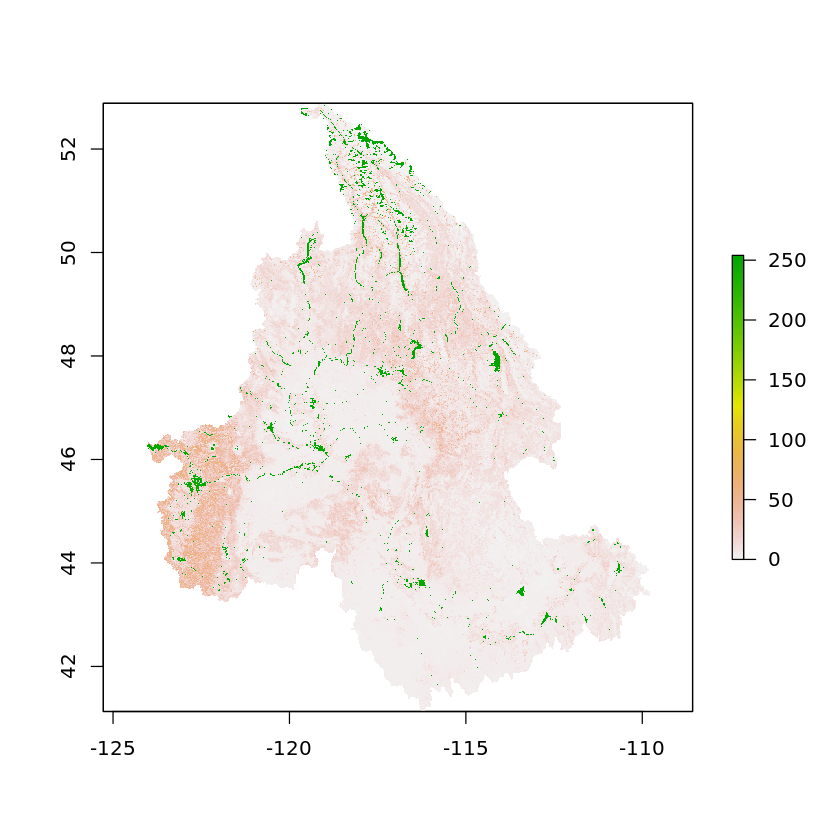

In [40]:
# plotting lAI files
library(raster)
library(rasterVis)

plot(raster(LAI_list[2]))

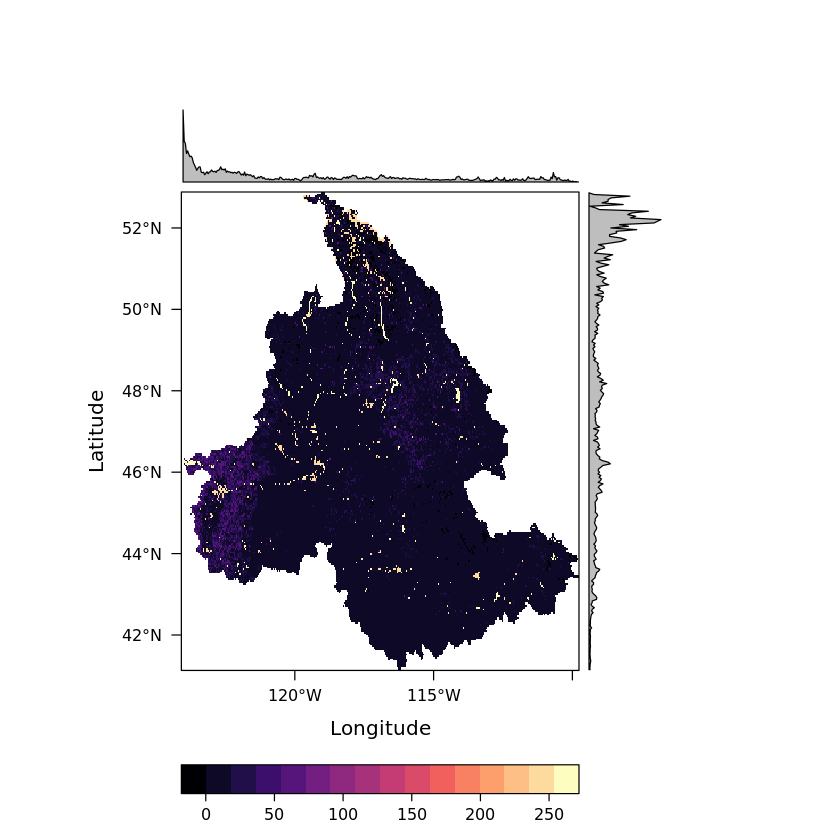

In [41]:

levelplot(raster(LAI_list[1]))

In [53]:
## cropping the the LAI data by the watershed boundary
# reading boundary of priest watershed-------------------
library(rgdal)
datapath_shape<-"/scratch/data/shapefiles"
yakima_shapefile<-readOGR(datapath_shape,layer="Yakima84")

OGR data source with driver: ESRI Shapefile 
Source: "/scratch/data/shapefiles", layer: "Yakima84"
with 1 features
It has 5 fields
Integer64 fields read as strings:  OBJECTID disID 


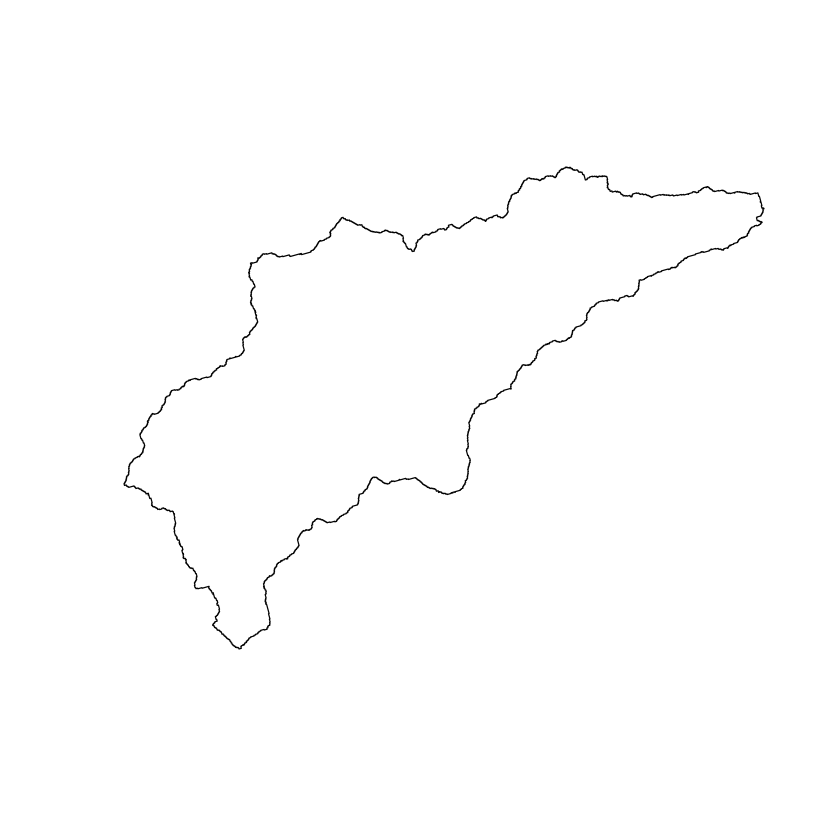

In [54]:
# plotting shapefiles
plot(yakima_shapefile)

In [31]:
# loading sf library
library(sf)
library(raster)
library(rasterVis)


In [32]:
# area weighted averaged values
s<-st_read(datapath_shape,"YakimaW84")
s<-s[,"GRIDCODE"]


Reading layer `YakimaW84' from data source `/scratch/data/shapefiles' using driver `ESRI Shapefile'
Simple feature collection with 5 features and 20 fields
geometry type:  POLYGON
dimension:      XY
bbox:           xmin: -121.5227 ymin: 46.81084 xmax: -121.1687 ymax: 46.99297
geographic CRS: WGS 84


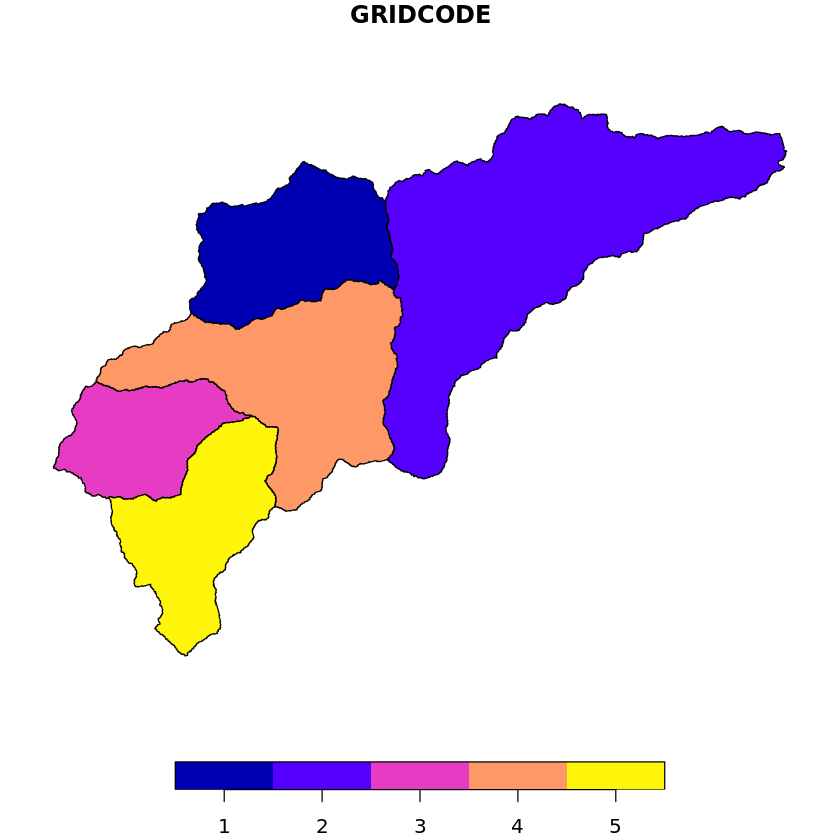

In [33]:
plot(s)

In [34]:
getwd()

[1] "/scratch/data/modis"

In [35]:
dir.create(paste(dataPath,"Yakima",sep="/"))

Warning message in dir.create(paste(dataPath, "Yakima", sep = "/")):
“'/scratch/data/modis/Yakima' already exists”


In [22]:
plot(raster(LAI_list[2]),col=rainbow(3),breaks = c(0,20,249))



ERROR: Error in raster(LAI_list[2]): object 'LAI_list' not found


In [36]:
LAI_list

[1] "MCD15A3H.006_Lai_500m_doy2019273_aid0001.tif"
 [2] "MCD15A3H.006_Lai_500m_doy2019277_aid0001.tif"
 [3] "MCD15A3H.006_Lai_500m_doy2019281_aid0001.tif"
 [4] "MCD15A3H.006_Lai_500m_doy2019285_aid0001.tif"
 [5] "MCD15A3H.006_Lai_500m_doy2019289_aid0001.tif"
 [6] "MCD15A3H.006_Lai_500m_doy2019293_aid0001.tif"
 [7] "MCD15A3H.006_Lai_500m_doy2019297_aid0001.tif"
 [8] "MCD15A3H.006_Lai_500m_doy2019301_aid0001.tif"
 [9] "MCD15A3H.006_Lai_500m_doy2019305_aid0001.tif"
[10] "MCD15A3H.006_Lai_500m_doy2019309_aid0001.tif"
[11] "MCD15A3H.006_Lai_500m_doy2019313_aid0001.tif"
[12] "MCD15A3H.006_Lai_500m_doy2019317_aid0001.tif"
[13] "MCD15A3H.006_Lai_500m_doy2019321_aid0001.tif"
[14] "MCD15A3H.006_Lai_500m_doy2019325_aid0001.tif"
[15] "MCD15A3H.006_Lai_500m_doy2019329_aid0001.tif"
[16] "MCD15A3H.006_Lai_500m_doy2019333_aid0001.tif"
[17] "MCD15A3H.006_Lai_500m_doy2019337_aid0001.tif"
[18] "MCD15A3H.006_Lai_500m_doy2019341_aid0001.tif"
[19] "MCD15A3H.006_Lai_500m_doy2019345_aid0001.tif"
[20] "MCD15A3H.006_Lai_500m_doy2019349_aid0001.tif"
[21] "MCD15A3H.006_Lai_500m_doy2019353_aid0001.tif"
[22] "MCD15A3H.006_Lai_500m_doy2019357_aid0001.tif"
[23] "MCD15A3H.006_Lai_500m_doy2019361_aid0001.tif"
[24] "MCD15A3H.006_Lai_500m_doy2019365_aid0001.tif"
[25] "MCD15A3H.006_Lai_500m_doy2020001_aid0001.tif"
[26] "MCD15A3H.006_Lai_500m_doy2020005_aid0001.tif"
[27] "MCD15A3H.006_Lai_500m_doy2020009_aid0001.tif"
[28] "MCD15A3H.006_Lai_500m_doy2020013_aid0001.tif"
[29] "MCD15A3H.006_Lai_500m_doy2020017_aid0001.tif"
[30] "MCD15A3H.006_Lai_500m_doy2020021_aid0001.tif"
[31] "MCD15A3H.006_Lai_500m_doy2020025_aid0001.tif"
[32] "MCD15A3H.006_Lai_500m_doy2020029_aid0001.tif"
[33] "MCD15A3H.006_Lai_500m_doy2020033_aid0001.tif"
[34] "MCD15A3H.006_Lai_500m_doy2020037_aid0001.tif"
[35] "MCD15A3H.006_Lai_500m_doy2020041_aid0001.tif"
[36] "MCD15A3H.006_Lai_500m_doy2020045_aid0001.tif"
[37] "MCD15A3H.006_Lai_500m_doy2020049_aid0001.tif"
[38] "MCD15A3H.006_Lai_500m_doy2020053_aid0001.tif"
[39] "MCD15A3H.006_Lai_500m_doy2020057_aid0001.tif"
[40] "MCD15A3H.006_Lai_500m_doy2020061_aid0001.tif"
[41] "MCD15A3H.006_Lai_500m_doy2020065_aid0001.tif"
[42] "MCD15A3H.006_Lai_500m_doy2020069_aid0001.tif"
[43] "MCD15A3H.006_Lai_500m_doy2020073_aid0001.tif"
[44] "MCD15A3H.006_Lai_500m_doy2020077_aid0001.tif"
[45] "MCD15A3H.006_Lai_500m_doy2020081_aid0001.tif"
[46] "MCD15A3H.006_Lai_500m_doy2020085_aid0001.tif"
[47] "MCD15A3H.006_Lai_500m_doy2020089_aid0001.tif"
[48] "MCD15A3H.006_Lai_500m_doy2020093_aid0001.tif"
[49] "MCD15A3H.006_Lai_500m_doy2020097_aid0001.tif"
[50] "MCD15A3H.006_Lai_500m_doy2020101_aid0001.tif"
[51] "MCD15A3H.006_Lai_500m_doy2020105_aid0001.tif"
[52] "MCD15A3H.006_Lai_500m_doy2020109_aid0001.tif"
[53] "MCD15A3H.006_Lai_500m_doy2020113_aid0001.tif"
[54] "MCD15A3H.006_Lai_500m_doy2020117_aid0001.tif"
[55] "MCD15A3H.006_Lai_500m_doy2020121_aid0001.tif"
[56] "MCD15A3H.006_Lai_500m_doy2020125_aid0001.tif"
[57] "MCD15A3H.006_Lai_500m_doy2020129_aid0001.tif"
[58] "MCD15A3H.006_Lai_500m_doy2020133_aid0001.tif"
[59] "MCD15A3H.006_Lai_500m_doy2020137_aid0001.tif"
[60] "MCD15A3H.006_Lai_500m_doy2020141_aid0001.tif"
[61] "MCD15A3H.006_Lai_500m_doy2020145_aid0001.tif"
[62] "MCD15A3H.006_Lai_500m_doy2020149_aid0001.tif"
[63] "MCD15A3H.006_Lai_500m_doy2020153_aid0001.tif"
[64] "MCD15A3H.006_Lai_500m_doy2020157_aid0001.tif"
[65] "MCD15A3H.006_Lai_500m_doy2020161_aid0001.tif"
[66] "MCD15A3H.006_Lai_500m_doy2020165_aid0001.tif"
[67] "MCD15A3H.006_Lai_500m_doy2020169_aid0001.tif"
[68] "MCD15A3H.006_Lai_500m_doy2020173_aid0001.tif"
[69] "MCD15A3H.006_Lai_500m_doy2020177_aid0001.tif"
[70] "MCD15A3H.006_Lai_500m_doy2020181_aid0001.tif"
[71] "MCD15A3H.006_Lai_500m_doy2020185_aid0001.tif"
[72] "MCD15A3H.006_Lai_500m_doy2020189_aid0001.tif"
[73] "MCD15A3H.006_Lai_500m_doy2020193_aid0001.tif"
[74] "MCD15A3H.006_Lai_500m_doy2020197_aid0001.tif"
[75] "MCD15A3H.006_Lai_500m_doy2020201_aid0001.tif"
[76] "MCD15A3H.006_Lai_500m_doy2020205_aid0001.tif"
[77] "MCD15A3H.006_Lai_500m_doy2020209_aid0001.ti

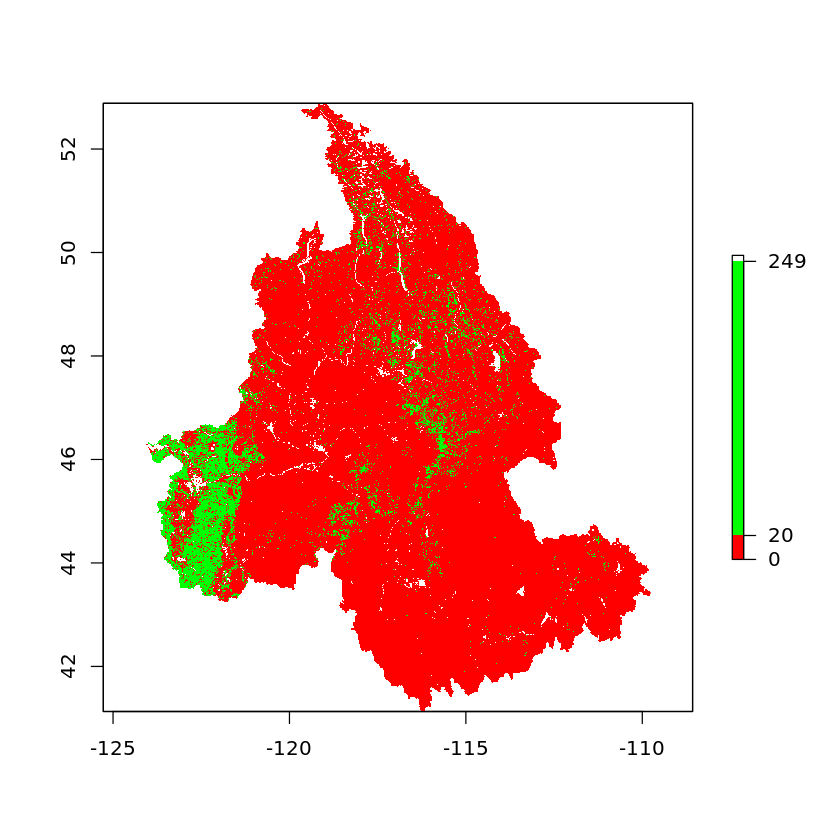

In [44]:
plot(raster(LAI_list[2]),col=rainbow(3),breaks = c(0,20,249))

In [48]:
## parallel computing
#install.packages("snow")
library(snow)


In [52]:
paste(dataPath,"Yakima",sep="/")


[1] "/scratch/data/modis/Yakima"

ERROR: Error in eval(expr, envir, enclos): object 'yakima_shapefile' not found


class      : RasterLayer 
dimensions : 43, 85, 3655  (nrow, ncol, ncell)
resolution : 0.004166667, 0.004166667  (x, y)
extent     : -121.5208, -121.1667, 46.8125, 46.99167  (xmin, xmax, ymin, ymax)
crs        : +proj=longlat +datum=WGS84 +no_defs 
source     : memory
names      : MCD15A3H.006_Lai_500m_doy2019273_aid0001 
values     : 1, 254  (min, max)


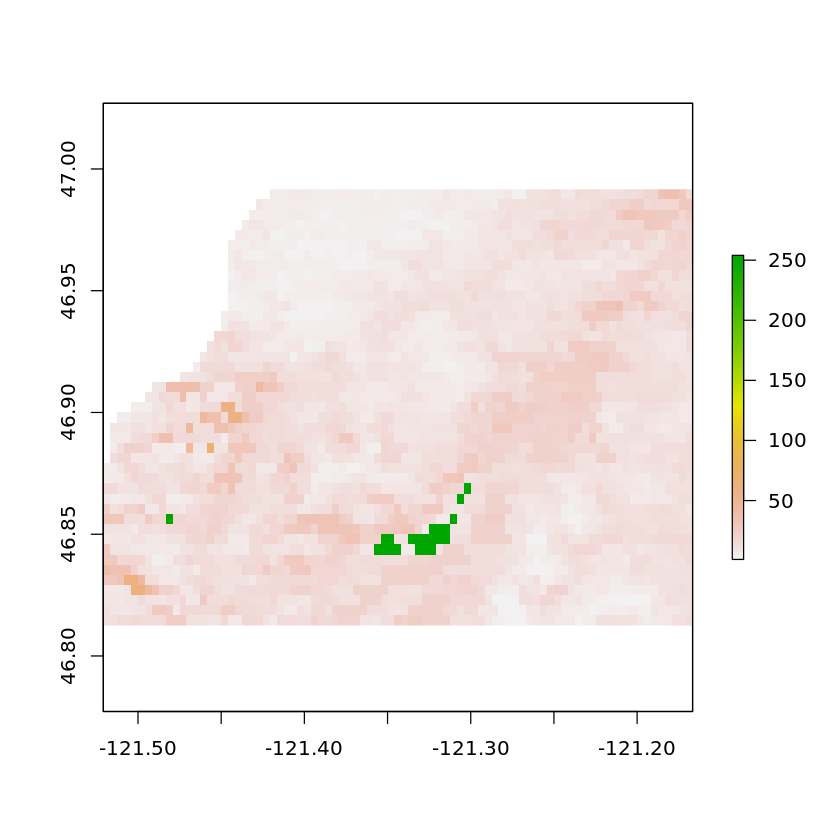

In [61]:
r<-raster(LAI_list[1])
rc2<-crop(r,extent(yakima_shapefile))
plot(rc2)


In [65]:
# cropping
beginCluster(n=10)

start_time <- Sys.time()

for(i in 1:length(LAI_list)) {
  r <-raster(LAI_list[i]) # raster(files[i])
 
 names=substr(names(r),26,32) 
 # cropping lai value for priest_yakima
  rc2<-crop(r,extent(yakima_shapefile))
  rc2[rc2>=249]<-NA
  rc2_0.1<-rc2*0.1
    
  writeRaster(rc2_0.1,file=paste(dataPath,"Yakima",paste0("LAI","_ya_",names,".tif"),sep="/"),overwrite=TRUE)
  
  rsd<-raster(LAIsd_list[i])
  rsd_c2<-crop(rsd,extent(yakima_shafile))
  rsd_c2[rsd_c2>=249]<-NA
  rsd_c20.01<-rsd_c2*0.01
  writeRaster(rsd_c20.01,file=paste(dataPath,"Yakima",paste0("LAI","_ya_sd_",names,".tif"),sep="/"),overwrite=TRUE)
  
  # reading QC of lai
  # subset data with quality
  rqc<-raster(LAIQC_list[i])
  rqc_c2<-crop(rqc,extent(yakima_shafile))
  
  qc_NA<-function(x) {ifelse(x==0,1,ifelse(x==2,1,ifelse(x==128,1,ifelse(x==130,1,NA))))}
  rqc_c2<-calc(rqc_c2,qc_NA)
  
  # 0, 2 and 128 and 130
  #rqc_c2[rqc_c2!=0|rqc_c2!=2|rqc_c2!=128|rqc_c2!=130]<-NA
  writeRaster(rqc_c2,file=paste(dataPath,"Yakima",paste0("LAI","_ya_qc_",names,".tif"),sep="/"),overwrite=TRUE)
  print(i)
  
}

endCluster()

end_time <- Sys.time()
end_time - start_time



[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13
[1] 14
[1] 15
[1] 16
[1] 17
[1] 18
[1] 19
[1] 20
[1] 21
[1] 22
[1] 23
[1] 24
[1] 25
[1] 26
[1] 27
[1] 28
[1] 29
[1] 30
[1] 31
[1] 32
[1] 33
[1] 34
[1] 35
[1] 36
[1] 37
[1] 38
[1] 39
[1] 40
[1] 41
[1] 42
[1] 43
[1] 44
[1] 45
[1] 46
[1] 47
[1] 48
[1] 49
[1] 50
[1] 51
[1] 52
[1] 53
[1] 54
[1] 55
[1] 56
[1] 57
[1] 58
[1] 59
[1] 60
[1] 61
[1] 62
[1] 63
[1] 64
[1] 65
[1] 66
[1] 67
[1] 68
[1] 69
[1] 70
[1] 71
[1] 72
[1] 73
[1] 74
[1] 75
[1] 76
[1] 77
[1] 78
[1] 79
[1] 80
[1] 81
[1] 82
[1] 83
[1] 84
[1] 85
[1] 86
[1] 87
[1] 88
[1] 89
[1] 90


Time difference of 1.069381 mins

In [ ]:
## Yakima river
setwd(paste(dataPath,"Yakima",sep="/"))

lai_list<-list.files(pattern=glob2rx("*LAI_ya_2*"))
lai_stack<-stack(lai_list)

# reading standard deviation of LAI
lai_sd_list<-list.files(pattern=glob2rx("*LAI_ya_sd*"))
lai_sd_stack<-stack(lai_sd_list)

lai_qc_list<-list.files(pattern=glob2rx("*LAI_ya_qc_2*"))
lai_qc_stack<-stack(lai_qc_list)



In [ ]:
# lai and lai_sd multiplied by lai_qc values
# if lai_qc is 1 (which means valid values)
library(raster)
library(snow)

# cropping
beginCluster(n=8)

r_lai<-lai_stack
r_sd<-lai_sd_stack

start_time <- Sys.time()

for (i in 1:length(lai_list)){
  r_lai[[i]]<-overlay(lai_stack[[i]],lai_qc_stack[[i]],fun=function(x,y){return(x*y)})
  r_sd[[i]]<-overlay(lai_sd_stack[[i]],lai_qc_stack[[i]],fun=function(x,y){return(x*y)})
  
}

endCluster()

end_time <- Sys.time()
end_time - start_time


In [ ]:
# parallel the codes for two stacks calculations
library(parallel)
r_lai <- stack(mclapply(1:nlayers(lai_stack)),function(i){ 
  lai_stack[[i]] * lai_qc_stack[[i]]
}, mc.cores = 8)


r_sd <- stack(mclapply(1:nlayers(lai_stack)), function(i){ 
  lai_sd_stack[[i]] * lai_qc_stack[[i]]
}, mc.cores = 8)




In [ ]:


# reading boundary of Yakima watershed-------------------
# color 
cols <- colorRampPalette(brewer.pal(9,"YlGn"))
levelplot(lai_stack[[1]], col.regions=cols,main="lai",scales=list(draw=FALSE,margin=F)) +latticeExtra::layer(sp.polygons(Yakima_shape, fill='white', alpha=0.3))
levelplot(lai_sd_stack[[1]], col.regions=cols,main="lai_sd",scales=list(draw=FALSE,margin=F)) +latticeExtra::layer(sp.polygons(Yakima_shape, fill='white', alpha=0.3))
levelplot(lai_qc_stack[[1]], col.regions=cols,main="lai_qc",scales=list(draw=FALSE,margin=F)) +latticeExtra::layer(sp.polygons(Yakima_shape, fill='white', alpha=0.3))


levelplot(r_lai[[1]], col.regions=cols,main="lai",scales=list(draw=FALSE,margin=F)) +latticeExtra::layer(sp.polygons(Yakima_shape, fill='white', alpha=0.3))
levelplot(r_sd[[1]], col.regions=cols,main="lai_sd",scales=list(draw=FALSE,margin=F)) +latticeExtra::layer(sp.polygons(Yakima_shape, fill='white', alpha=0.3))


In [ ]:
# creating time/date----
year<-as.numeric(substr(names(lai_stack),8,11))
dayofyear<-as.numeric(substr(names(lai_stack),12,14))
date<-strptime(paste0(year,dayofyear),format="%Y %j")
month<-month(date)
day<-day(date)

#animate---
##http://strimas.com/r/snowfall/

animate_raster(layer,out_dir = out_dir, conv_dir = conv_dir, layer_type = "gradient",
               out_format = "mov")


In [ ]:
library(exactextractr)
# creating matrix files
x<-matrix(0,ncol=5,nrow=length(lai_list))
y<-matrix(0,ncol=5,nrow=length(lai_sd_list))

# area weighted averaged values
s<-st_read(datapath,"YakimaW84")
s<-s[,"GRIDCODE"]

#calculateing weighted mean----
for (i in 1:length(lai_list)){
  x[i,] <- exact_extract(lai_stack[[i]],s, weighted.mean, na.rm=TRUE)
  y[i,] <- exact_extract(lai_sd_stack[[i]],s, weighted.mean, na.rm=TRUE)
  
}


In [ ]:
# creating matrix files
x2<-matrix(0,ncol=5,nrow=length(lai_list))
y2<-matrix(0,ncol=5,nrow=length(lai_sd_list))


# exclude the pixed with bad quality
#calculateing weighted mean----
for (i in 1:length(lai_list)){
  x2[i,] <- exact_extract(r_lai[[i]],s, weighted.mean, na.rm=TRUE)
  y2[i,] <- exact_extract(r_sd[[i]],s, weighted.mean, na.rm=TRUE)
  
}


In [ ]:



# ploting lai values per subbasin
x<-data.frame(x)
x$date<-date
x$month<-month(x$date)
x$year<-year(x$date)

par(mfrow=c(2,5))
plot(x$date[x$year==2003],x[,1][x$year==2003],type="l",xlab="Days",ylab="LAI")
plot(x$date[x$year==2004],x[,1][x$year==2004],type="l",xlab="Days",ylab="LAI")
lines(x$date[x$year==2004],x[,2][x$year==2004],col=cols[2])
lines(x$date[x$year==2004],x[,3][x$year==2004],col=cols[3])
lines(x$date[x$year==2004],x[,4][x$year==2004],col=cols[4])
lines(x$date[x$year==2004],x[,5][x$year==2004],col=cols[5])

plot(x$date[x$year==2005],x[,1][x$year==2005],type="l",xlab="Days",ylab="LAI")
plot(x$date[x$year==2006],x[,1][x$year==2006],type="l",xlab="Days",ylab="LAI")
plot(x$date[x$year==2007],x[,1][x$year==2007],type="l",xlab="Days",ylab="LAI")
plot(x$date[x$year==2008],x[,1][x$year==2008],type="l",xlab="Days",ylab="LAI")
plot(x$date[x$year==2009],x[,1][x$year==2009],type="l",xlab="Days",ylab="LAI")
plot(x$date[x$year==2010],x[,1][x$year==2010],type="l",xlab="Days",ylab="LAI")
plot(x$date[x$year==2011],x[,1][x$year==2011],type="l",xlab="Days",ylab="LAI")
plot(x$date[x$year==2012],x[,1][x$year==2012],type="l",xlab="Days",ylab="LAI")
